In [36]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
# import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
sig = np.load("../../data/mimic/raw/p00/p000333/p000333_1.npy")

In [39]:
import matplotlib.pyplot as plt


In [40]:
sig.shape

(30000, 3)

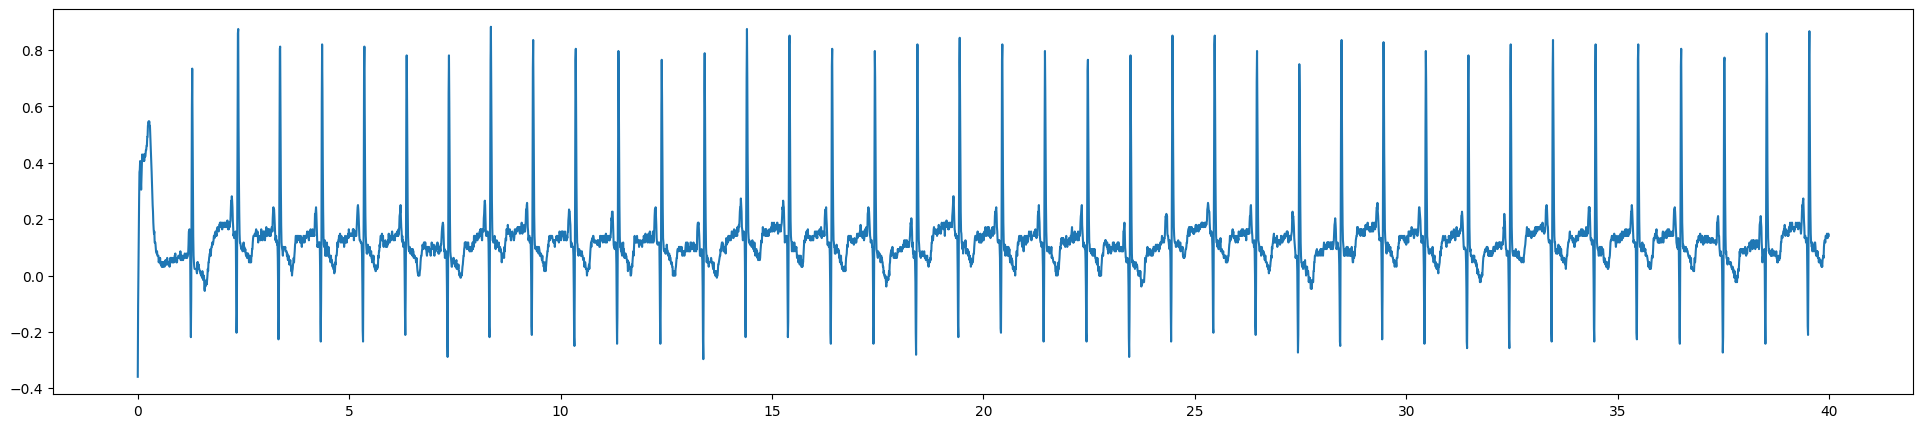

In [49]:
plt.figure(figsize=(24, 5))
t = np.arange(sig.shape[0]) / 125
plt.plot(t[:5000], sig[:5000, 2])

In [50]:
import pandas as pd

In [65]:
samples_info = pd.read_csv("../../data/mimic/logs/sample_segments_info.txt")
subject = 'p000160'

In [66]:
samples_info['subject'] = [sample_id.split("_")[0] for sample_id in samples_info['sample_id']]
samples_info.set_index('subject', inplace=True)

In [ ]:
numpy_files = [path]

In [76]:
import glob
from msr.data.raw.mimic import RAW_DATASET_PATH

In [110]:
subject

'/home/shate/Desktop/praca_magisterska/medical_signal_representation/data/mimic/raw/p00/p002458'

In [131]:
def get_all_sample_paths():
    all_sample_paths = []
    prefixes = glob.glob(str(RAW_DATASET_PATH / "*"))
    for prefix in prefixes:
        subjects = glob.glob(f"{prefix}/*")
        for subject in subjects:
            samples = glob.glob(f"{subject}/*.npy")
            for sample in samples:
                prefix, subject, sample_id = sample.split("/")[-3:]
                all_sample_paths.append({
                    'subject': subject, 
                    'sample_id': sample_id,
                    'path': f"{prefix}/{subject}/{sample_id}"
                })
    return pd.DataFrame(all_sample_paths).set_index('subject')

In [134]:
get_all_sample_paths()

,sample_id,path
subject,,
p001004,p001004_3.npy,p00/p001004/p001004_3.npy
p001004,p001004_25.npy,p00/p001004/p001004_25.npy
p001004,p001004_22.npy,p00/p001004/p001004_22.npy
p001004,p001004_12.npy,p00/p001004/p001004_12.npy
p001004,p001004_26.npy,p00/p001004/p001004_26.npy
...,...,...
p002858,p002858_5.npy,p00/p002858/p002858_5.npy
p002858,p002858_13.npy,p00/p002858/p002858_13.npy
p002458,p002458_1.npy,p00/p002458/p002458_1.npy


In [98]:
def concat_all_subject_samples(subject):
    numpy_files = glob.glob(str(RAW_DATASET_PATH / subject[:3] / f"{subject}/*.npy"))
    subject_all_samples = np.array([np.load(f) for f in numpy_files])
    return subject_all_samples

In [99]:
subject = "p000160"
subject_all_samples = concat_all_subject_samples(subject)

In [101]:
subject_all_samples.shape

(31, 30000, 3)

# **TODO**
* Create train/val/test raw tensors for MIMIC dataset